In [1]:

import pandas as pd
from tqdm import tqdm
#Ignore some warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
pd.options.display.max_columns = 500

In [3]:


imdb_df = pd.read_csv("/Users/dougs/Documents/GitHub/Project-Evaluation/data/descriptive_movie_data_from_tmdb.csv")
df = pd.read_excel("/Users/dougs/Documents/GitHub/audience-evaluation/data/Weekend 1 & 2 Exits - All Titles Jan 2021 - Aug 2024_v2.xlsx")

In [4]:
df['OBO'] = pd.to_numeric(df['OBO'], errors='coerce')
df['DBO'] = pd.to_numeric(df['DBO'], errors='coerce')

df['10-12'] = pd.to_numeric(df['10-12'], errors='coerce')


df.rename({ 'PostTrak\nFilm\nType':'type','Locs\nat\nOpening':'locs_open', 'Locs\nat\nWidest\nRelease':'locs_wide',
       'Definitely\nRecommend' :'def_rec'}, axis=1, inplace=True)

In [5]:
df['Release\nDate'] = pd.to_datetime(df['Release\nDate'])
df['quarter_year'] = df['Release\nDate'].dt.to_period('Q').astype(str)
df

,Title,type,Release\nDate,Genre,Rating,Dist,OBO,DBO,locs_open,locs_wide,Polling\nWk,def_rec,Total Excellent,\nM<25\nExcellent,M 25+ Excellent,F <25 Excellent,F25+ Excellent,White - Excellent,Latine \nExcellent,AA\nExcellent,Asian\nExcellent,Other\nExcellent,Gen,Par,Kid,M,F,M\n25<,M\n25+,F\n25<,F\n25+,M\n7<,M\n7-9,M\n10-12,F\n7<,F\n7-9,F\n10-12,25<,25+,7<,7-9,10-12,13-17,18-24,25-34,35-44,45-54,55+,Cauc,Hisp,AA,Asian,NatAm/\nOther,quarter_year
0,Afraid,General,2024-08-30 07:00:00,HOR,PG13,SNY,3665664.0,5197743,3003,3003,1,0.27,0.18,0.20,0.18,0.24,0.12,0.18,0.23,0.15,0.14,0.08,1.0,-,-,0.4891,0.5109,0.1703,0.3210,0.2205,0.2904,-,-,-,-,-,-,0.3908,0.6092,-,-,NaN,0.0983,0.2926,0.2620,0.1638,0.1114,0.0721,0.4694,0.2795,0.1397,0.0721,0.0371,2024Q3
1,City of Dreams,General,2024-08-30 07:00:00,SUS,R,RSA,1245167.0,1573049,774,774,1,0.63,0.54,0.61,0.52,0.52,0.56,0.42,0.71,0.67,0.39,0.54,1.0,-,-,0.4906,0.5094,0.1186,0.3693,0.1294,0.3801,-,-,-,-,-,-,0.2507,0.7493,-,-,NaN,0.0431,0.2075,0.2345,0.1240,0.1725,0.2183,0.4609,0.3908,0.0512,0.0755,0.0243,2024Q3
2,Reagan,General,2024-08-30 07:00:00,DRA,PG13,SBD,7650720.0,13300040,2754,2770,1,0.76,0.67,0.51,0.66,0.47,0.72,0.68,0.65,0.61,0.53,0.73,1.0,-,-,0.5006,0.4994,0.0615,0.4391,0.0381,0.4613,-,-,-,-,-,-,0.0996,0.9004,-,-,NaN,0.0197,0.0812,0.0701,0.0849,0.1550,0.5904,0.8499,0.0898,0.0295,0.0123,0.0172,2024Q3
3,"Forge, The",General,2024-08-23 07:00:00,DRA,PG,SNY,6659508.0,17821694,1818,1921,1,0.85,0.82,0.53,0.82,0.70,0.91,0.79,0.90,0.82,0.64,0.87,1.0,-,-,0.4098,0.5902,0.0976,0.3122,0.1024,0.4878,-,-,-,-,-,-,0.2000,0.8000,-,-,NaN,0.0463,0.1537,0.0915,0.0976,0.2037,0.4085,0.4500,0.1902,0.3098,0.0146,0.0354,2024Q3
4,Blink Twice,General,2024-08-23 07:00:00,SUS,R,AMZMGM,7301894.0,18176976,3067,3067,1,0.51,0.39,0.40,0.35,0.42,0.41,0.36,0.48,0.44,0.33,0.24,1.0,-,-,0.4596,0.5404,0.1250,0.3346,0.2047,0.3346,-,-,-,-,-,-,0.3297,0.6703,-,-,NaN,0.0306,0.2990,0.3333,0.1483,0.1017,0.0858,0.5404,0.1998,0.1703,0.0539,0.0368,2024Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,Land,General,2021-02-12 08:00:00,DRA,PG13,FOC,899810.0,2577830,1231,1349,1,0.42,0.40,0.46,0.42,0.18,0.41,0.40,0.45,0.14,0.42,0.30,1.0,-,-,0.4702,0.5298,0.0316,0.4386,0.0667,0.4632,-,-,-,-,-,-,0.0982,0.9018,-,-,NaN,0.0491,0.0526,0.2035,0.2421,0.1263,0.3263,0.8211,0.1298,0.0316,0.0105,0.0105,2021Q1
391,Judas and the Black Messiah,General,2021-02-12 08:00:00,DRA,R,WB,2027076.0,5478009,1888,1906,1,0.74,0.62,0.59,0.62,0.67,0.62,0.52,0.53,0.69,0.53,0.62,1.0,-,-,0.5105,0.4895,0.1480,0.3625,0.1319,0.3576,-,-,-,-,-,-,0.2799,0.7201,-,-,NaN,0.0444,0.2355,0.3181,0.1973,0.1332,0.0703,0.2799,0.1196,0.5894,0.0037,0.0062,2021Q1
392,"Little Things, The",General,2021-01-29 08:00:00,SUS,R,WB,4705527.0,15342746,2171,2206,1,0.37,0.27,0.24,0.28,0.16,0.30,0.27,0.25,0.29,0.27,0.23,1.0,-,-,0.5296,0.4704,0.1198,0.4111,0.1309,0.3395,-,-,-,-,-,-,0.2494,0.7506,-,-,NaN,0.0679,0.1827,0.1988,0.1901,0.1802,0.1815,0.5704,0.2000,0.2099,0.0099,0.0111,2021Q1
393,Our Friend,General,2021-01-22 08:00:00,DRA,R,GRAV,240160.0,642187,543,818,1,0.49,0.31,0.15,0.31,0.49,0.33,0.39,0.00,0.30,0.00,0.00,1.0,-,-,0.5342,0.4658,0.1781,0.3562,0.1370,0.3288,-,-,-,-,-,-,0.3151,0.6849,-,-,NaN,0.0411,0.2740,0.2192,0.2192,0.1370,0.1096,0.6849,0.1370,0.1370,0.0274,0.0000,2021Q1


In [6]:
audit_df = df[['Title']]
audit_df['imdb_id'] = None
audit_df.to_clipboard()

In [7]:
movie_title_list = list(imdb_df.title.unique())

In [8]:
genrelist = ['FAM','ANI']

In [9]:
filtered_df = df.query("Genre ==@genrelist & Rating =='PG'")
filtered_df.columns

Index(['Title', 'type', 'Release\nDate', 'Genre', 'Rating', 'Dist', 'OBO',
       'DBO', 'locs_open', 'locs_wide', 'Polling\nWk', 'def_rec',
       'Total Excellent', '\nM<25\nExcellent', 'M 25+ Excellent',
       'F <25 Excellent', 'F25+ Excellent', 'White - Excellent',
       'Latine \nExcellent', 'AA\nExcellent', 'Asian\nExcellent',
       'Other\nExcellent', 'Gen', 'Par', 'Kid', 'M', 'F', 'M\n25<', 'M\n25+',
       'F\n25<', 'F\n25+', 'M\n7<', 'M\n7-9', 'M\n10-12', 'F\n7<', 'F\n7-9',
       'F\n10-12', '25<', '25+', '7<', '7-9', '10-12', '13-17', '18-24',
       '25-34', '35-44', '45-54', '55+', 'Cauc', 'Hisp', 'AA', 'Asian',
       'NatAm/\nOther', 'quarter_year'],
      dtype='object')

In [10]:
analysis_df = filtered_df[['Title', 'type', 'Genre', 'Rating',
       'Dist', 'OBO', 'DBO', 'locs_open', 'locs_wide',
       'def_rec', 'Total Excellent', 'M', 'F', 'M\n25<', 'M\n25+', 'F\n25<', 'F\n25+', 'M\n7<',
       'M\n7-9', 'M\n10-12', 'F\n7<', 'F\n7-9', 'F\n10-12', '25<', '25+', '7<',
       '7-9', '10-12', '13-17', '18-24', '25-34', '35-44', '45-54', '55+',
       'Cauc', 'Hisp', 'AA', 'Asian', 'NatAm/\nOther']]

In [11]:
numerical_cols = ['OBO', 'DBO', 'locs_open', 'locs_wide',
       'def_rec', 'Total Excellent', 'M', 'F', 
        '25<', '25+', '10-12', '13-17', '18-24', '25-34', '35-44', '45-54', '55+',
       'Cauc', 'Hisp', 'AA', 'Asian', 'NatAm/\nOther']

In [12]:
analysis_df.replace('-', 0, inplace=True)
analysis_df[['OBO', 'DBO']] = analysis_df[['OBO', 'DBO']] / 1_000_000
df[['OBO', 'DBO']] = df[['OBO', 'DBO']] / 1_000_000


## Comparison

In [14]:
df.groupby(by='Genre')[numerical_cols].mean().round(2)

,OBO,DBO,locs_open,locs_wide,def_rec,Total Excellent,M,F,25<,25+,10-12,13-17,18-24,25-34,35-44,45-54,55+,Cauc,Hisp,AA,Asian,NatAm/\nOther
Genre,,,,,,,,,,,,,,,,,,,,,,
,50.02,137.62,3611.00,3839.00,0.69,0.56,0.17,0.83,0.46,0.54,NaN,0.08,0.38,0.24,0.12,0.08,0.11,0.55,0.29,0.06,0.07,0.03
ACT,41.12,120.42,3361.46,3407.89,0.60,0.48,0.59,0.41,0.37,0.63,0.06,0.07,0.26,0.25,0.16,0.12,0.10,0.49,0.25,0.14,0.08,0.05
ADV,37.46,101.49,3272.89,3516.00,0.58,0.45,0.56,0.44,0.41,0.59,0.07,0.07,0.27,0.24,0.16,0.11,0.09,0.55,0.20,0.14,0.07,0.04
ANI,26.23,97.48,3017.28,3100.88,0.63,0.54,0.51,0.49,0.60,0.40,0.12,0.11,0.24,0.20,0.14,0.05,0.02,0.42,0.32,0.12,0.09,0.05
COM,11.02,39.71,2204.45,2573.27,0.56,0.44,0.46,0.54,0.29,0.71,0.08,0.06,0.22,0.23,0.15,0.13,0.19,0.61,0.17,0.12,0.07,0.03
DOC,2.58,6.21,1548.33,1585.67,0.62,0.51,0.50,0.50,0.19,0.81,NaN,0.04,0.16,0.16,0.18,0.20,0.26,0.73,0.15,0.08,0.03,0.02
DRA,6.39,23.34,1957.84,2195.39,0.62,0.52,0.48,0.52,0.24,0.76,0.08,0.04,0.19,0.20,0.16,0.15,0.25,0.64,0.16,0.13,0.05,0.03
FAM,10.57,37.65,2760.10,2815.40,0.59,0.48,0.44,0.56,0.51,0.49,0.12,0.10,0.15,0.14,0.16,0.09,0.10,0.56,0.25,0.11,0.05,0.04
FAN,2.92,8.29,2436.00,2436.00,0.46,0.38,0.56,0.44,0.32,0.68,NaN,0.02,0.30,0.24,0.15,0.13,0.16,0.64,0.14,0.10,0.09,0.04


In [15]:
df.groupby(by='Rating')[numerical_cols].mean().round(2)

,OBO,DBO,locs_open,locs_wide,def_rec,Total Excellent,M,F,25<,25+,10-12,13-17,18-24,25-34,35-44,45-54,55+,Cauc,Hisp,AA,Asian,NatAm/\nOther
Rating,,,,,,,,,,,,,,,,,,,,,,
G,13.15,40.13,3184.00,3189.00,0.77,0.48,0.46,0.54,0.63,0.37,0.15,0.10,0.06,0.11,0.19,0.06,0.00,0.40,0.33,0.21,0.03,0.03
NR,10.76,18.71,1844.00,1877.33,0.73,0.65,0.45,0.55,0.35,0.65,0.01,0.05,0.29,0.28,0.14,0.09,0.13,0.36,0.11,0.20,0.26,0.07
PG,23.22,88.57,2914.33,2981.86,0.62,0.52,0.46,0.54,0.49,0.51,0.12,0.10,0.17,0.15,0.15,0.09,0.11,0.52,0.27,0.11,0.06,0.04
PG13,29.77,88.14,3054.12,3166.79,0.61,0.50,0.51,0.49,0.37,0.63,0.06,0.09,0.25,0.22,0.15,0.12,0.14,0.52,0.23,0.14,0.07,0.04
R,10.95,32.84,2346.01,2559.34,0.52,0.41,0.54,0.46,0.33,0.67,NaN,0.05,0.28,0.27,0.16,0.11,0.12,0.55,0.23,0.13,0.06,0.04


In [16]:
df.groupby(by='type')[numerical_cols].mean().round(2)

,OBO,DBO,locs_open,locs_wide,def_rec,Total Excellent,M,F,25<,25+,10-12,13-17,18-24,25-34,35-44,45-54,55+,Cauc,Hisp,AA,Asian,NatAm/\nOther
type,,,,,,,,,,,,,,,,,,,,,,
Family,25.84,97.03,3260.73,3332.37,0.60,0.50,0.47,0.53,0.59,0.41,0.13,0.11,0.17,0.15,0.16,0.07,0.04,0.47,0.30,0.13,0.06,0.05
General,11.29,36.14,2430.43,2611.69,0.55,0.44,0.51,0.49,0.31,0.69,0.01,0.06,0.25,0.25,0.16,0.12,0.16,0.55,0.21,0.13,0.07,0.04
Hybrid,56.92,164.18,3650.61,3697.87,0.65,0.53,0.54,0.46,0.49,0.51,0.06,0.10,0.27,0.22,0.14,0.09,0.06,0.47,0.27,0.13,0.08,0.05


## Trends


In [18]:
trend_df = df.groupby(by=["quarter_year", 'Genre'])[numerical_cols].mean().round(2).reset_index()

In [19]:
df.Genre.unique()

array(['HOR', 'SUS', 'DRA', 'ACT', ' ', 'FAM', 'COM', 'ANI', 'WES', 'SCI',
       'ADV', 'ROMANCE', 'SPECIAL', 'MUS', 'RCOM', 'DOC', 'FAN'],
      dtype=object)

In [20]:
genres = ['HOR']

genre_df = trend_df.query("Genre==@genres")
overall_df = trend_df.query("Genre!=@genres")

The max for the Genre over the timeframe was 78.24 on 2023Q4 while the last value was 39.0.
This represents a Last to Max Ratio of 0.5


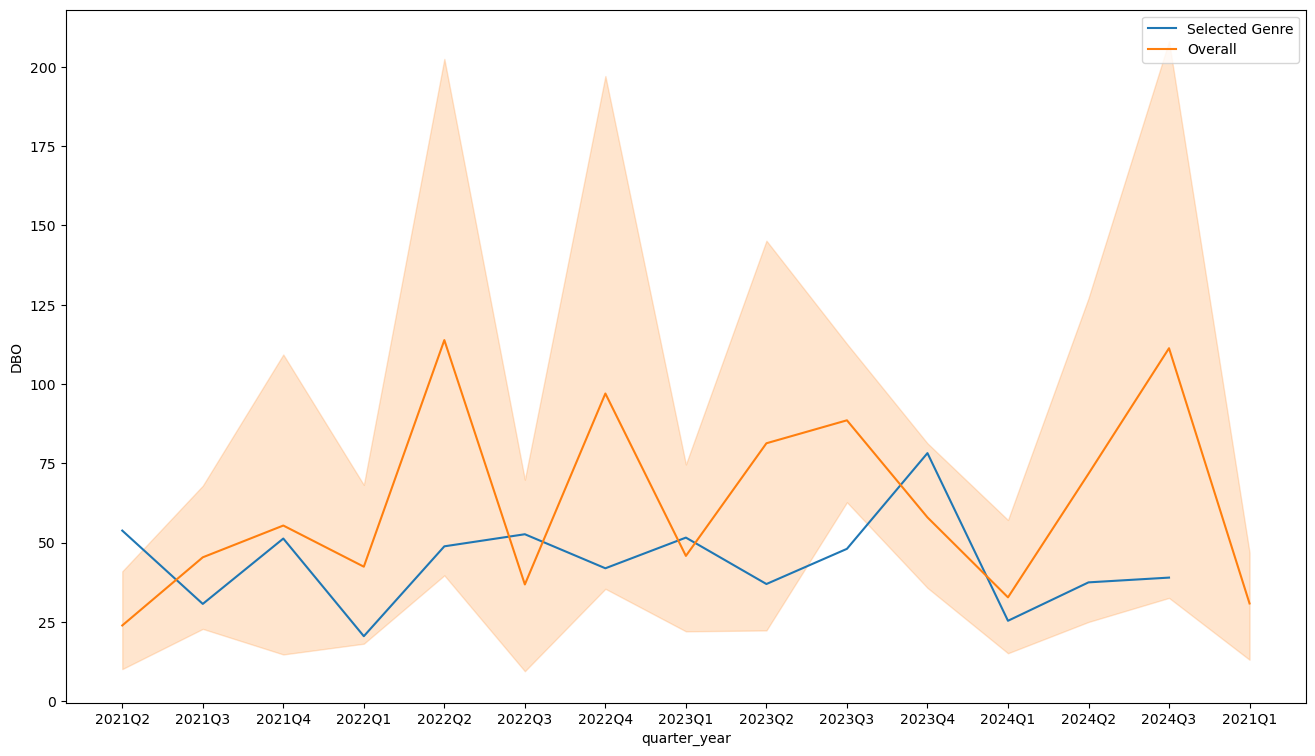

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
sns.lineplot(data=genre_df, x='quarter_year', y='DBO' ,label='Selected Genre', errorbar=None)
sns.lineplot(data=overall_df, x='quarter_year', y='DBO', label='Overall')


## Peak End Analysis
peak_end = genre_df.groupby('quarter_year')['DBO'].mean()
max_genre = peak_end.max()
max_date = peak_end[peak_end == max_genre].index[0]
last_genre = peak_end[-1:].values[0]
ratio = last_genre/max_genre
print (f"The max for the Genre over the timeframe was {max_genre} on {max_date} while the last value was {last_genre}.\nThis represents a Last to Max Ratio of {round(ratio,2)}")

In [23]:
genre_df.groupby('quarter_year')['DBO'].mean()

quarter_year
2021Q2    53.82
2021Q3    30.71
2021Q4    51.31
2022Q1    20.53
2022Q2    48.86
2022Q3    52.67
2022Q4    41.94
2023Q1    51.61
2023Q2    36.98
2023Q3    48.07
2023Q4    78.24
2024Q1    25.39
2024Q2    37.50
2024Q3    39.00
Name: DBO, dtype: float64

In [56]:
index = peak_end[peak_end == max_genre].index[0]
index

'2023Q4'